#**PREDICTION OF COMPUTED TOMOGRAPHY FINDINGS USING SERUM METABOLITES MEASURED AFTER TRUMATIC BRAIN INJURY**

In [ ]:
!apt install python3-venv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-venv is already the newest version (3.10.6-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [ ]:
!python3 -m venv serum_tbi
!source serum_tbi/bin/activate

In [ ]:
#import the necessary libraries to work with
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

tbi_two = pd.read_csv('/content/drive/MyDrive/serum_tbi/TBI project.csv')
tbi_two = tbi_two.reset_index(drop=True)
print(tbi_two.head())

#Check for null values
print(tbi_two.isnull().sum())
print(tbi_two.shape)

      Marshall CT  CT Findings  CEFragment0946  CE1810868  CE1820971  \
0  Diffuse Injury  Positive CT        0.001761   0.004955  -0.000448   
1  Diffuse Injury  Positive CT        0.002957   0.005701  -0.000454   
2  Diffuse Injury  Positive CT        0.002273   0.005070  -0.000132   
3        Negative  Negative CT        0.002468   0.005694  -0.000414   
4        Negative  Negative CT        0.001929   0.004813  -0.000415   

   CE2040694  CE2050600  Cerd401d1812200987  Cerd1812200998  Cerd1812300977  \
0   0.000393   0.002005            0.004034        0.003643        0.003507   
1   0.000305   0.001678            0.004046        0.003543        0.003246   
2   0.000433   0.001635            0.004031        0.003659        0.003092   
3   0.000638   0.001451            0.003967        0.003429        0.003234   
4   0.000580   0.001404            0.003784        0.003359        0.003147   

   ...  GlutamicAcid_1615  DecanoicAcid_1457  Norleucine_128976  \
0  ...           2.109000

In [ ]:
tbi_two.describe()

,CEFragment0946,CE1810868,CE1820971,CE2040694,CE2050600,Cerd401d1812200987,Cerd1812200998,Cerd1812300977,Cerd1812400981,Cerd1812410993,...,GlutamicAcid_1615,DecanoicAcid_1457,Norleucine_128976,mesoErythritol_148979,X_MetaminoAcid_165561,X_MetphenolicCompound_173839,QuinicAcid_185709,betaDGlucose_188525,X_MetglucoseOrMannose_188598,X_MetSorbitolOrMannitol_192843
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,...,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.002095,0.005677,-0.000322,0.000632,0.001876,0.003865,0.003574,0.003461,0.002004,0.003113,...,1.780440,0.029149,-0.853644,-2.943738,-4.005086,-4.077121,-2.999469,-0.001951,-0.580667,-0.254659
std,0.000440,0.000836,0.000256,0.000380,0.000977,0.000299,0.000300,0.000322,0.000370,0.000279,...,0.695381,0.620311,0.513571,1.091173,1.426979,4.083427,1.665997,0.345527,0.396072,1.294639
min,0.000411,0.003796,-0.000742,-0.000190,-0.000287,0.002792,0.002665,0.002505,0.000948,0.001866,...,0.000000,-2.407946,-5.157694,-6.442003,-6.249024,-30.365221,-8.887579,-3.472903,-2.718328,-3.495373
25%,0.001813,0.005165,-0.000414,0.000417,0.001303,0.003666,0.003381,0.003234,0.001764,0.002940,...,1.589235,-0.010611,-1.023128,-3.522581,-4.660390,-5.167326,-3.779119,-0.011227,-0.771744,-0.766053
50%,0.002076,0.005639,-0.000358,0.000566,0.001694,0.003861,0.003561,0.003454,0.001984,0.003120,...,1.895484,-0.009940,-0.908218,-3.239357,-4.390551,-3.938618,-3.076175,-0.008437,-0.630172,-0.199778
75%,0.002346,0.006126,-0.000312,0.000746,0.002182,0.004060,0.003757,0.003662,0.002208,0.003288,...,2.172476,0.000000,-0.696950,-2.839007,-3.901855,-1.623918,-2.128152,0.000000,-0.443369,0.128708
max,0.003752,0.009120,0.001314,0.002745,0.007446,0.004984,0.004712,0.004815,0.003377,0.004288,...,3.695718,5.108971,0.787155,0.364688,0.000000,5.720801,0.000000,2.478435,2.816394,3.335927


In [ ]:
#Split data into target(y) and independent variables(X)
X = tbi_two.drop(["CT Findings", "Marshall CT"], axis=1)
#Encode the target variable
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})

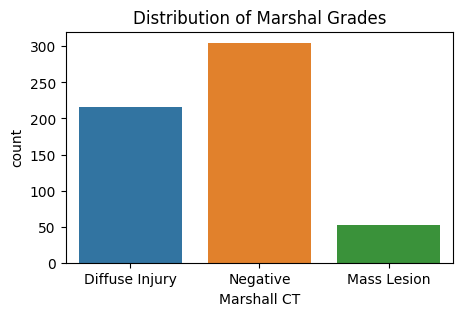

In [ ]:
# Visualize distribution of the target variable - Marshal Grade
plt.figure(figsize=(5, 3))
sns.countplot(x='Marshall CT', data=tbi_two)
plt.title('Distribution of Marshal Grades')
plt.show()

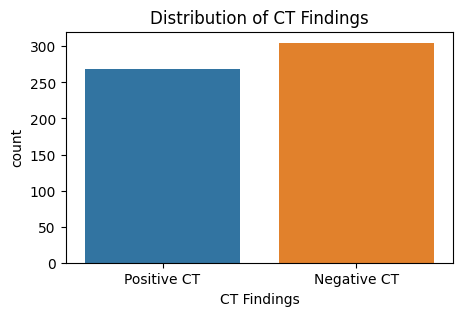

In [ ]:
# Visualize distribution of the target variable - CT findings
plt.figure(figsize=(5, 3))
sns.countplot(x='CT Findings', data=tbi_two)
plt.title('Distribution of CT Findings')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Use SelectKBest to select the top k features based on ANOVA F-statistics
k_best = SelectKBest(score_func=f_classif, k='all')
fit = k_best.fit(X, y)

# Get feature scores and names
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)[:200]


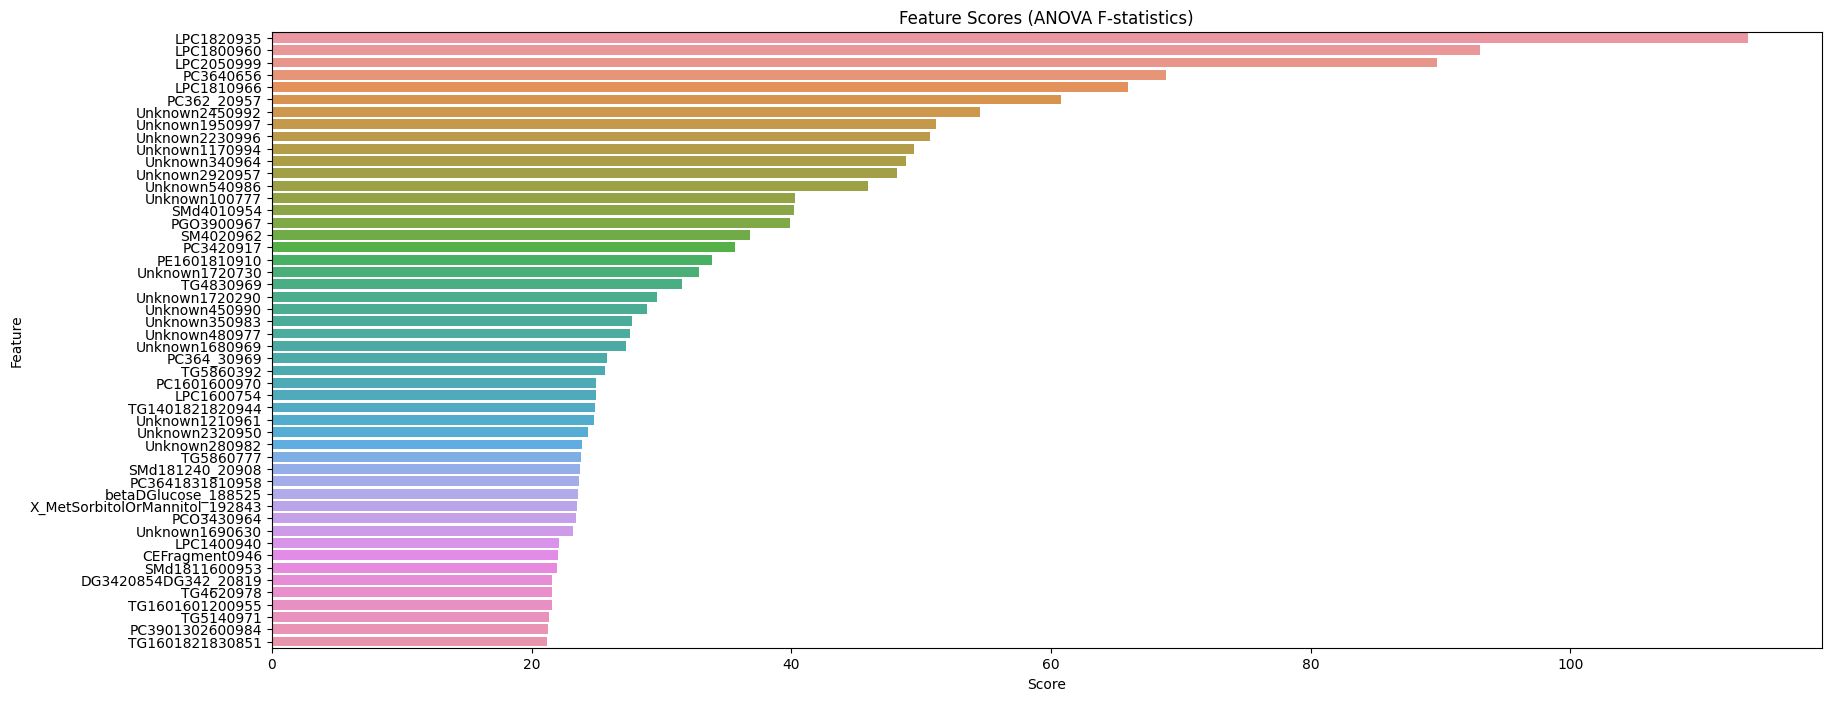

In [ ]:
# Visualize feature scores
plt.figure(figsize=(20, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores[:50])
plt.title('Feature Scores (ANOVA F-statistics)')
plt.show()

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})

# **LOGISTIC REGRESSION MODEL (CT FINDINGS AS TARGET VARIABLE)**

In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

In [ ]:

# Use the best hyperparameter to build a logistic regression model eith CT Findings as target
ct_log_model = LogisticRegression(C=0.02858667904100823, max_iter=100, penalty='l2', solver='liblinear', random_state=42)
ct_log_model.fit(X_train_scaled, y_train)

# set a decision threshold for categorization of target variable(CT Findings)
threshold = 0.5

# make predictions using the trained model
y_pred_train = np.argmax(ct_log_model.predict_proba(X_train_scaled) > threshold, axis=1)
y_pred_test = np.argmax(ct_log_model.predict_proba(X_test_scaled) > threshold, axis=1)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_test)
print("Sensitivity/Recall:", sensitivity)

# Calculate specificity
specificity = recall_score(y_test, y_pred_test, pos_label=0)
print("Specificity:", specificity)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

Train Accuracy: 0.7991266375545851
Test Accuracy: 0.7913043478260869
Precision: 0.7818181818181819
Sensitivity/Recall: 0.7818181818181819
Specificity: 0.8
F1 Score: 0.7818181818181819


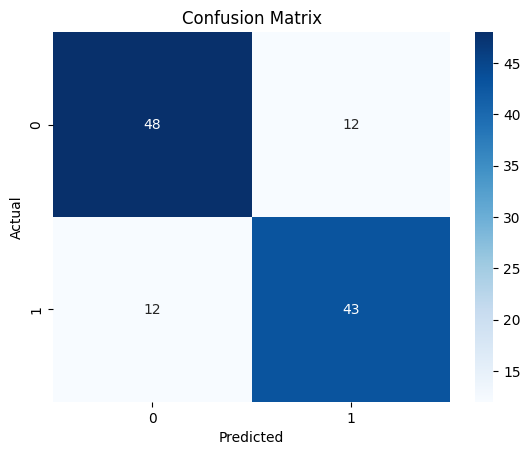

In [ ]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

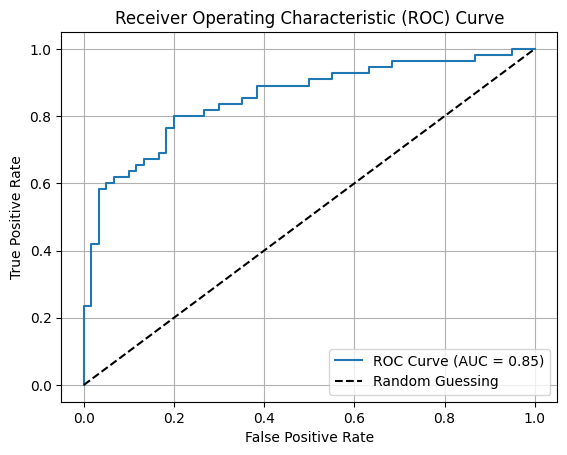

In [ ]:
# Create ROC AUC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_probsl = ct_log_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fprl, tprl, thresholdsl = roc_curve(y_test, y_test_probsl)

# Calculate the AUC (Area Under the Curve) score
aucl = roc_auc_score(y_test, y_test_probsl)

# Plot the ROC curve
plt.plot(fprl, tprl, label='ROC Curve (AUC = {:.2f})'.format(aucl))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score
from sklearn.model_selection import KFold
# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    ct_log_model.fit(X_train, y_train)

    # Make predictions
    y_pred = ct_log_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")




Mean Accuracy: 0.6090 ± 0.0725
Mean Precision: 0.5994 ± 0.1051
Mean Recall: 0.5231 ± 0.1346
Mean F1 Score: 0.5484 ± 0.0972


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


Confidence Interval: (0.5641, 0.6540)


# **LOGISTIC REGRESSION MODEL (MARSHAL GRADE AS TARGET VARIABLE)**

In [ ]:
# Separate data set into target and independent variables

features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["Marshall CT"].map({"Negative":0, "Diffuse Injury":1, "Mass Lesion":2})



In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.7248908296943232
Test Accuracy: 0.7130434782608696
Precision: 0.7040193834971059
Sensitivity (Recall): 0.7130434782608696
Specificity: 0.7130434782608696
F1 Score: 0.6950697434925909


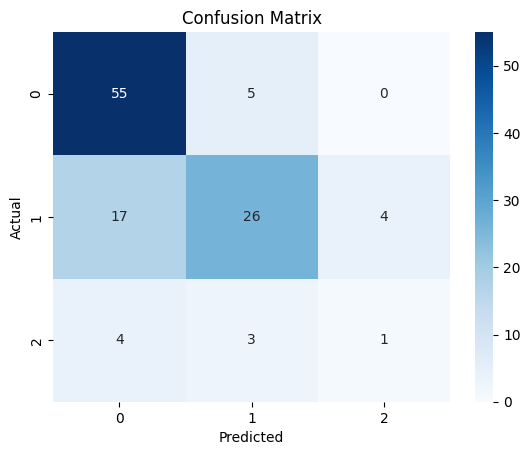

In [ ]:

# Use the best hyperparameter to build a logistic regression model
m_log_model = LogisticRegression(C=0.2853858667904100823, max_iter=100, penalty='l1', solver='saga')
m_log_model.fit(X_train_scaled, y_train)

# set a decision threshold for categorization of dependent variable
threshold = 0.4

# make predictions using the trained model
y_train_pred = np.argmax(m_log_model.predict_proba(X_train_scaled) > threshold, axis=1)
y_test_pred = np.argmax(m_log_model.predict_proba(X_test_scaled) > threshold, axis=1)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
# Calculate precision
precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# Calculate specificity
specificity = recall_score(y_test, y_test_pred, pos_label=0, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

#Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score

# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    m_log_model.fit(X_train, y_train)

    # Make predictions
    y_pred = m_log_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, m_log_model.predict_proba(X_test), average='weighted', multi_class='ovr')
    roc_auc_scores.append(roc_auc)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Calculate the mean and std of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")



Mean Accuracy: 0.5566 ± 0.0573
Mean Precision: 0.4792 ± 0.0914
Mean Recall: 0.5566 ± 0.0573
Mean F1 Score: 0.4903 ± 0.0829
Mean ROC AUC: 0.6271 ± 0.0542


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


Confidence Interval: (0.5211, 0.5921)


# **SUPPORT VECTOR MACHINES (CT FINDINGS AS TARGET VARIABLE)**

In [ ]:
# Separate data set into target and independent variables
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})


In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.7554585152838428
Test Accuracy: 0.7652173913043478
Precision: 0.7258064516129032
Sensitivity (Recall): 0.8181818181818182
Specificity: 0.7166666666666667
F1 Score: 0.7692307692307693


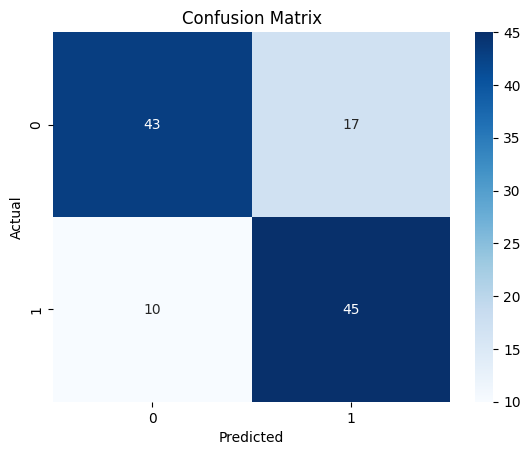

In [ ]:
# Create a SVC classifier
ct_svc = SVC(kernel='linear', C=0.004, gamma='scale', class_weight='balanced', random_state=42)

# Train the classifier on the normalized training data
ct_svc.fit(X_train_scaled, y_train)

# Make predictions on the normalized test data
y_pred_train = ct_svc.predict(X_train_scaled)
y_pred_test = ct_svc.predict(X_test_scaled)
# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# Calculate precision
precision = precision_score(y_test, y_pred_test)

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_test)

# Calculate specificity
specificity = recall_score(y_test, y_pred_test, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

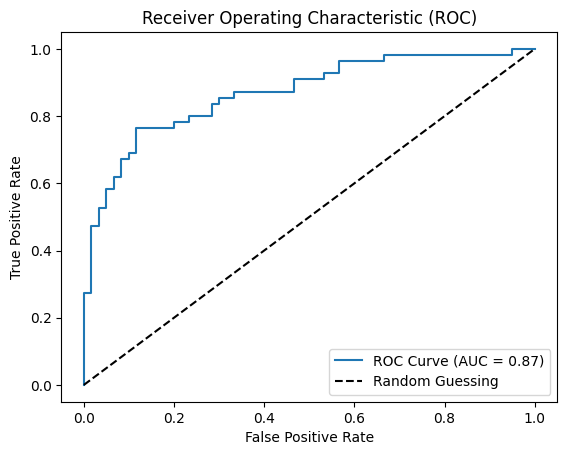

In [ ]:

#create an ROC AUC curve
y_test_probss = ct_svc.decision_function(X_test_scaled)

#Calculate the false positive rate, true positive rate, and threshold values
fprs, tprs, thresholdss = roc_curve(y_test, y_test_probss)

# Calculate the Area Under the ROC Curve (AUC)
aucs = roc_auc_score(y_test, y_test_probss)

# Plot the ROC curve
plt.plot(fprs, tprs, label='ROC Curve (AUC = {:.2f})'.format(aucs))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score
from sklearn.model_selection import KFold
# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    ct_svc.fit(X_train, y_train)

    # Make predictions
    y_pred = ct_svc.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")


Mean Accuracy: 0.6004 ± 0.0541
Mean Precision: 0.5638 ± 0.0655
Mean Recall: 0.6184 ± 0.1214
Mean F1 Score: 0.5856 ± 0.0783


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


Confidence Interval: (0.5669, 0.6339)


# **SUPPORT VECTOR MACHINES (MARSHAL GRADE AS TARGET VARIABLE)**

In [ ]:
# MAKE PREDICTIONS ON THE MARSHALL GRADE

# Separate data set into target and independent variables
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["Marshall CT"].map({"Negative":0, "Diffuse Injury":1, "Mass Lesion":2})


In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.8427947598253275
Test Accuracy: 0.5652173913043478
Precision: 0.5965440356744705
Sensitivity (Recall): 0.5652173913043478
Specificity: 0.5652173913043478
F1 Score: 0.5784967981125717


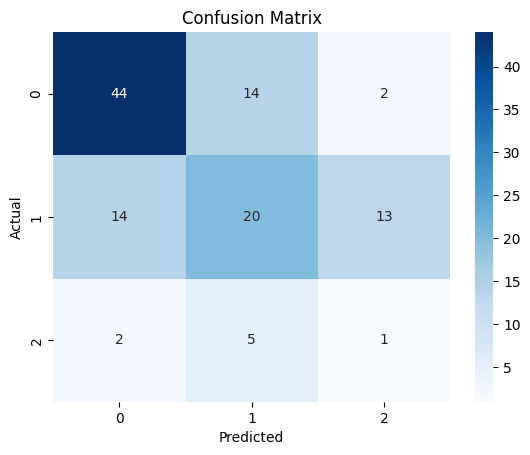

In [ ]:
# Create a SVC classifier
m_svc = SVC(C=0.1, gamma=0.05, kernel='linear', probability=True, class_weight='balanced')

# Train the classifier on the normalized training data
m_svc.fit(X_train_scaled, y_train)

# Make predictions on the normalized test data
y_train_pred = m_svc.predict(X_train_scaled)
y_test_pred = m_svc.predict(X_test_scaled)
# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
# Calculate precision
precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# Calculate specificity
specificity = recall_score(y_test, y_test_pred, pos_label=0, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score

# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    m_svc.fit(X_train, y_train)

    # Make predictions
    y_pred = m_svc.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, m_svc.predict_proba(X_test), average='weighted', multi_class='ovr')
    roc_auc_scores.append(roc_auc)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Calculate the mean and std of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

Mean Accuracy: 0.4050 ± 0.0452
Mean Precision: 0.5064 ± 0.0876
Mean Recall: 0.4050 ± 0.0452
Mean F1 Score: 0.4102 ± 0.0416
Mean ROC AUC: 0.6300 ± 0.0601


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")


Confidence Interval: (0.3769, 0.4330)


# **K NEAREST NEIGHBOUR (CT FINDINGS AS TARGET VARIABLE)**


In [ ]:
# Separate data sets into target and independent variables
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})

In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.7052401746724891
Test Accuracy: 0.7217391304347827
Precision: 0.7346938775510204
Sensitivity/Recall: 0.6545454545454545
Specificity: 0.7833333333333333
F1 Score: 0.6923076923076923


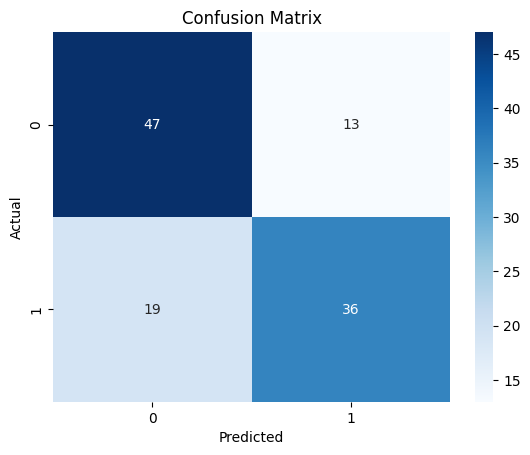

In [ ]:
# CREATE A KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

ct_knn = KNeighborsClassifier(n_neighbors=11)

# Train the classifier on the normalized training data
ct_knn.fit(X_train_scaled, y_train)

threshold = 0.5
#make prediciton
y_pred_train = np.argmax(ct_knn.predict_proba(X_train_scaled) > threshold, axis=1)
y_pred_test = np.argmax(ct_knn.predict_proba(X_test_scaled) > threshold, axis=1)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_test)
print("Sensitivity/Recall:", sensitivity)

# Calculate specificity
specificity = recall_score(y_test, y_pred_test, pos_label=0)
print("Specificity:", specificity)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

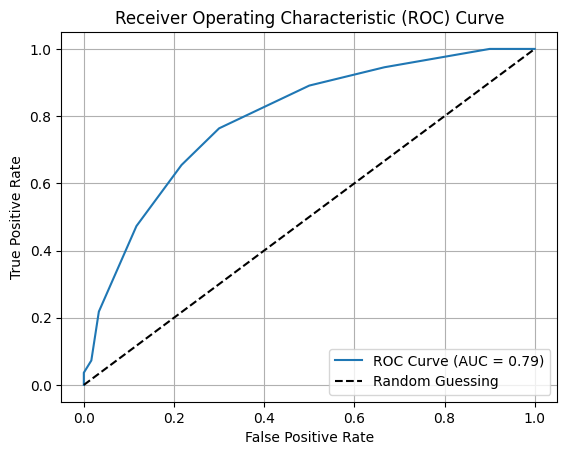

In [ ]:
# Create and ROC AUC Curve
y_test_probsk = ct_knn.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fprk, tprk, thresholdsk = roc_curve(y_test, y_test_probsk)

# Calculate the AUC (Area Under the Curve) score
auck = roc_auc_score(y_test, y_test_probsk)

# Plot the ROC curve
plt.plot(fprk, tprk, label='ROC Curve (AUC = {:.2f})'.format(auck))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score
from sklearn.model_selection import KFold
# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    ct_knn.fit(X_train, y_train)

    # Make predictions
    y_pred = ct_knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")


Mean Accuracy: 0.5932 ± 0.0575
Mean Precision: 0.5785 ± 0.0774
Mean Recall: 0.5031 ± 0.1119
Mean F1 Score: 0.5304 ± 0.0750


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.5576, 0.6289)


#**K NEAREST NEIGHBOUR (MARSHAL GRADE AS TARGET VARIABLE)**

In [ ]:
# MAKE PREDICTIONS ON THE MARSHALL GRADE
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["Marshall CT"].map({"Negative":0, "Diffuse Injury":1, "Mass Lesion":2})


In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.6135371179039302
Test Accuracy: 0.6
Precision: 0.5748353096179183
Sensitivity (Recall): 0.6
Specificity: 0.6
F1 Score: 0.5584018801410106


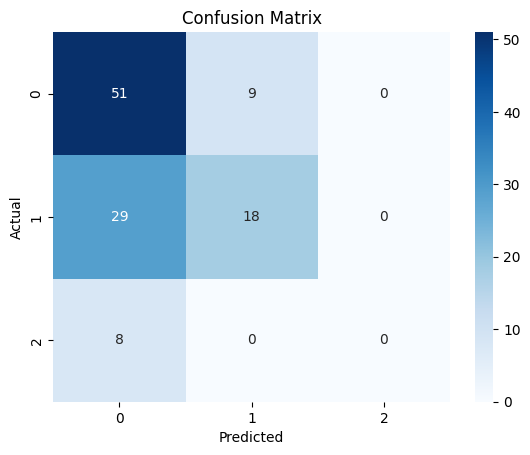

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m_knn = KNeighborsClassifier(n_neighbors=11)

# Train the classifier on the normalized training data
m_knn.fit(X_train_scaled, y_train)

threshold = 0.5

y_pred_train = np.argmax(m_knn.predict_proba(X_train_scaled) > threshold, axis=1)
y_pred_test = np.argmax(m_knn.predict_proba(X_test_scaled) > threshold, axis=1)


# Calculate accuracyaccuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# Calculate precision
precision = precision_score(y_test, y_pred_test, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_test, average='weighted')

# Calculate specificity
specificity = recall_score(y_test, y_pred_test, pos_label=0, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score

# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    m_knn.fit(X_train, y_train)

    # Make predictions
    y_pred = m_knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, m_knn.predict_proba(X_test), average='weighted', multi_class='ovr')
    roc_auc_scores.append(roc_auc)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Calculate the mean and std of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

Mean Accuracy: 0.5531 ± 0.0736
Mean Precision: 0.4979 ± 0.0988
Mean Recall: 0.5531 ± 0.0736
Mean F1 Score: 0.5121 ± 0.0922
Mean ROC AUC: 0.6040 ± 0.0712


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.5075, 0.5987)


#**NAIVE BAYES (CT FINDINGS AS TARGET VARIABLE)**

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})

In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.6855895196506551
Test Accuracy: 0.7043478260869566
Precision: 0.6615384615384615
Sensitivity/Recall: 0.7818181818181819
Specificity: 0.6333333333333333
F1 Score: 0.7166666666666666


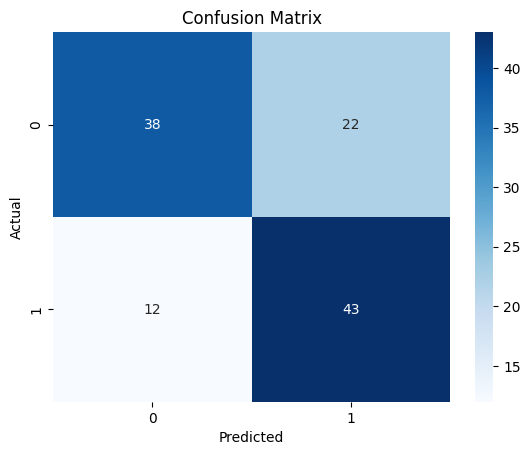

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes classifier
ct_clf = GaussianNB()
ct_clf.fit(X_train_scaled, y_train)

y_pred_train = ct_clf.predict(X_train_scaled)
y_pred_test = ct_clf.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_test)
print("Sensitivity/Recall:", sensitivity)

# Calculate specificity
specificity = recall_score(y_test, y_pred_test, pos_label=0)
print("Specificity:", specificity)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

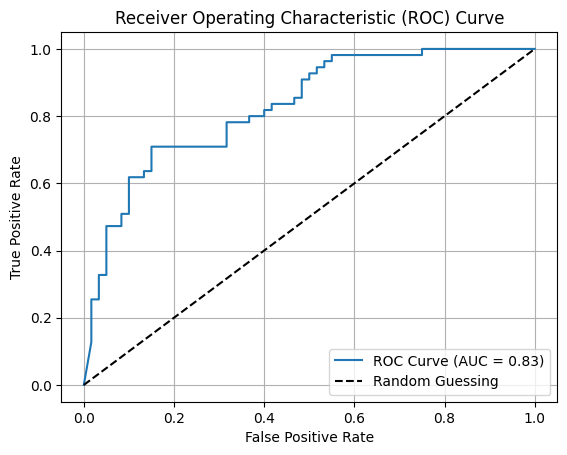

In [ ]:
# Create and ROC AUC Curve
y_test_probsn = ct_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fprn, tprn, thresholdsn = roc_curve(y_test, y_test_probsn)

# Calculate the AUC (Area Under the Curve) score
aucn = roc_auc_score(y_test, y_test_probsn)

# Plot the ROC curve
plt.plot(fprn, tprn, label='ROC Curve (AUC = {:.2f})'.format(aucn))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score
from sklearn.model_selection import KFold
# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    ct_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = ct_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")


Mean Accuracy: 0.6613 ± 0.0449
Mean Precision: 0.6179 ± 0.0702
Mean Recall: 0.7113 ± 0.0837
Mean F1 Score: 0.6587 ± 0.0645


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.6335, 0.6892)



#**NAIVE BAYES (MARSHAL GRADE AS TARGET VARIABLE)**


In [ ]:
# MAKE PREDICTIONS ON THE MARSHALL GRADE
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["Marshall CT"].map({"Negative":0, "Diffuse Injury":1, "Mass Lesion":2})


In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.5895196506550219
Test Accuracy: 0.5304347826086957
Precision: 0.5937883310951253
Sensitivity (Recall): 0.5304347826086957
Specificity: 0.5304347826086957
F1 Score: 0.5538306112809805


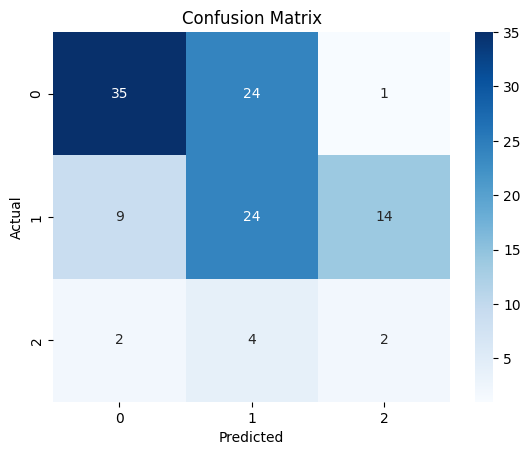

In [ ]:
# Initialize and train the Naive Bayes classifier
m_clf = GaussianNB()
m_clf.fit(X_train_scaled, y_train)

y_pred_train = m_clf.predict(X_train_scaled)
y_pred_test = m_clf.predict(X_test_scaled)

# Calculate accuracyaccuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# Calculate precision
precision = precision_score(y_test, y_pred_test, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_test, average='weighted')

# Calculate specificity
specificity = recall_score(y_test, y_pred_test, pos_label=0, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score

# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    m_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = m_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, m_clf.predict_proba(X_test), average='weighted', multi_class='ovr')
    roc_auc_scores.append(roc_auc)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Calculate the mean and std of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

Mean Accuracy: 0.5374 ± 0.0635
Mean Precision: 0.5743 ± 0.0645
Mean Recall: 0.5374 ± 0.0635
Mean F1 Score: 0.5466 ± 0.0598
Mean ROC AUC: 0.6763 ± 0.0672


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.4981, 0.5768)


# **DECISION TREES (CT FINDINGS AS TARGET VARIABLE)**

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})

In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.7336244541484717
Test Accuracy: 0.7565217391304347
Precision: 0.7288135593220338
Sensitivity/Recall: 0.7818181818181819
Specificity: 0.7333333333333333
F1 Score: 0.7543859649122807


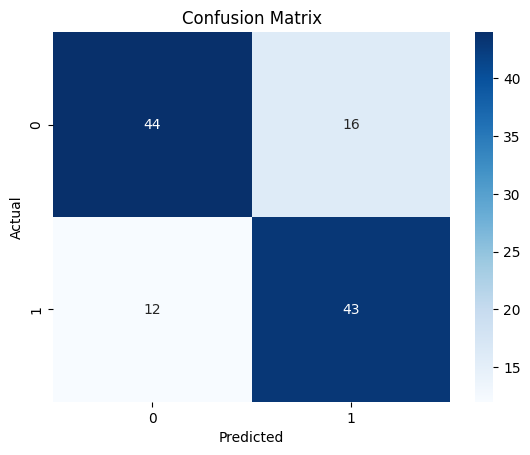

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


# Create a decision tree base estimator
base_estimator = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=10, max_depth=2, random_state=42)

# Create a BaggingClassifier with the base estimator
ct_d_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the bagging model on the training data
ct_d_model.fit(X_train_scaled, y_train)

# Make predictions using the bagging model
y_pred_train = ct_d_model.predict(X_train_scaled)
y_pred_test = ct_d_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_test)
print("Sensitivity/Recall:", sensitivity)

# Calculate specificity
specificity = recall_score(y_test, y_pred_test, pos_label=0)
print("Specificity:", specificity)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

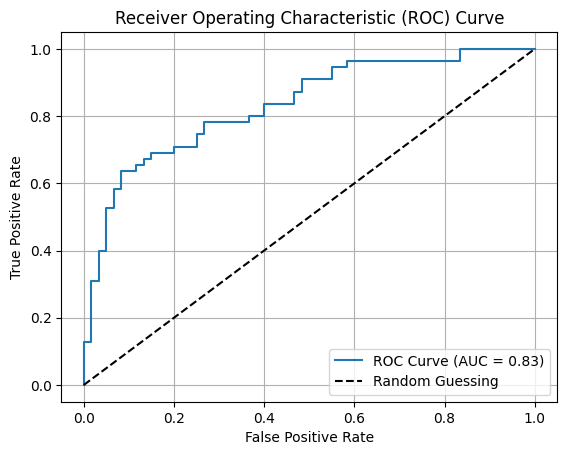

In [ ]:
# Create and ROC AUC Curve
y_test_probsd = ct_d_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fprd, tprd, thresholdsd = roc_curve(y_test, y_test_probsd)

# Calculate the AUC (Area Under the Curve) score
aucd = roc_auc_score(y_test, y_test_probsd)

# Plot the ROC curve
plt.plot(fprd, tprd, label='ROC Curve (AUC = {:.2f})'.format(aucd))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score
from sklearn.model_selection import KFold
# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    ct_d_model.fit(X_train, y_train)

    # Make predictions
    y_pred = ct_d_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")


Mean Accuracy: 0.6791 ± 0.0672
Mean Precision: 0.6434 ± 0.0835
Mean Recall: 0.7158 ± 0.0912
Mean F1 Score: 0.6739 ± 0.0697


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.6375, 0.7207)



#**DECISION TREES (MARSHAL GRADE AS TARGET VARIABLE)**


In [ ]:
# MAKE PREDICTIONS ON THE MARSHALL GRADE

features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["Marshall CT"].map({"Negative":0, "Diffuse Injury":1, "Mass Lesion":2})


In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.6921397379912664
Test Accuracy: 0.6869565217391305
Precision: 0.6415676519622111
Sensitivity (Recall): 0.6869565217391305
Specificity: 0.6869565217391305
F1 Score: 0.6631817533856023


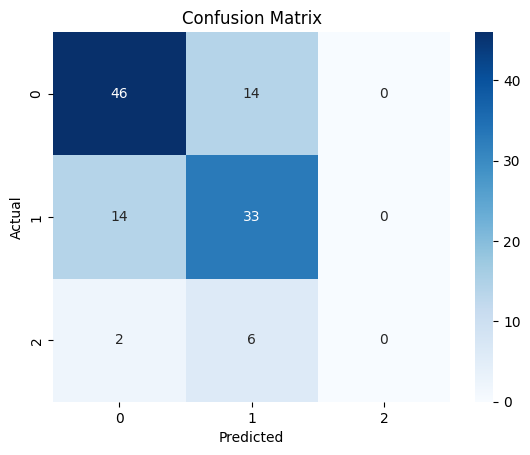

In [ ]:
# Create a decision tree base estimator
base_estimator = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=10, max_depth=2, random_state=42)

# Create a BaggingClassifier with the base estimator
m_d_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=80, random_state=42)

# Fit the bagging model on the training data
m_d_model.fit(X_train_scaled, y_train)

# Make predictions using the bagging model
y_train_pred = m_d_model.predict(X_train_scaled)
y_test_pred = m_d_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
# Calculate precision
precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# Calculate specificity
specificity = recall_score(y_test, y_test_pred, pos_label=0, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score

# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    m_d_model.fit(X_train, y_train)

    # Make predictions
    y_pred = m_d_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, m_d_model.predict_proba(X_test), average='weighted', multi_class='ovr')
    roc_auc_scores.append(roc_auc)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Calculate the mean and std of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

Mean Accuracy: 0.6178 ± 0.0627
Mean Precision: 0.5701 ± 0.0871
Mean Recall: 0.6178 ± 0.0627
Mean F1 Score: 0.5903 ± 0.0727
Mean ROC AUC: 0.7387 ± 0.0573


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.5789, 0.6567)


#**RANDOM FOREST (CT FINDINGS AS TARGET VARIABLE)**

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})

In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Training Accuracy: 0.7882096069868996
Testing Accuracy: 0.782608695652174
Precision: 0.75
Sensitivity/Recall: 0.8181818181818182
Specificity: 0.75
F1 Score: 0.7826086956521738


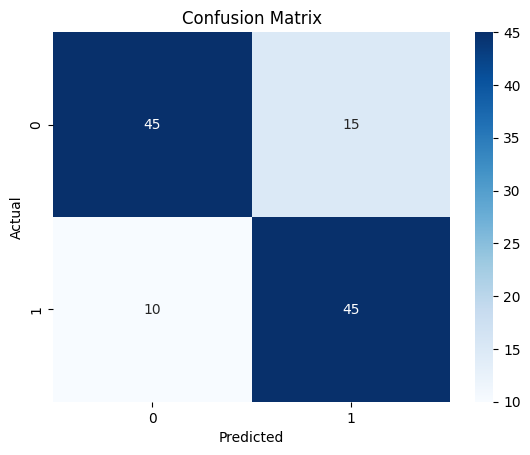

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
ct_rf_classifier = RandomForestClassifier(max_depth=3, max_features=20, n_estimators=100, min_samples_split=15, class_weight='balanced', random_state=42)

# Train the classifier on the normalized training data
ct_rf_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the training and testing data
y_train_pred = ct_rf_classifier.predict(X_train_scaled)
y_test_pred = ct_rf_classifier.predict(X_test_scaled)

# Calculate the accuracy of the classifier on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Calculate precision
precision = precision_score(y_test, y_test_pred)
print("Precision:", precision)

# Calculate sensitivity/recall
sensitivity = recall_score(y_test, y_test_pred)
print("Sensitivity/Recall:", sensitivity)

# Calculate specificity
specificity = recall_score(y_test, y_test_pred, pos_label=0)
print("Specificity:", specificity)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

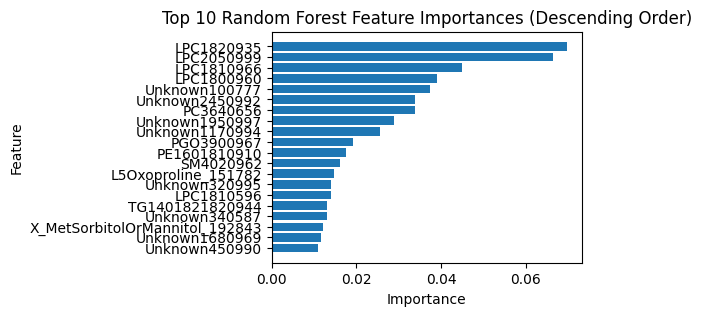

In [ ]:
# Identify important features in data that influences CT Findings
importances = ct_rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
sorted_feature_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Select the top 10 important features
top_20_feature_importances = sorted_feature_importances[:20]
top_20_feature_names = sorted_feature_names[:20]

# Create a bar plot to visualize the top 20 feature importances
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
plt.barh(range(len(top_20_feature_importances)), top_20_feature_importances)
plt.yticks(range(len(top_20_feature_importances)), top_20_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Random Forest Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


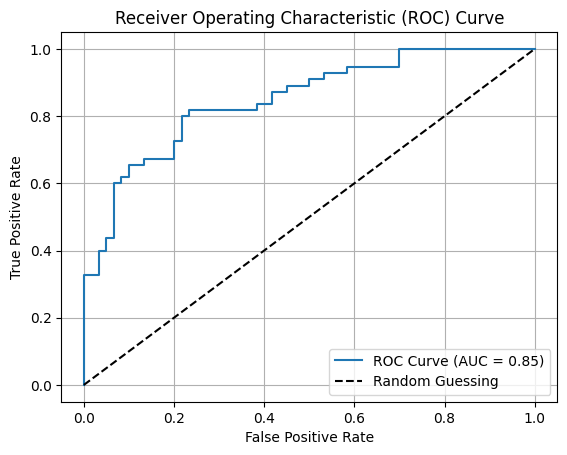

In [ ]:
# Create and ROC AUC Curve
y_test_probsr = ct_rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fprr, tprr, thresholdsr = roc_curve(y_test, y_test_probsr)

# Calculate the AUC (Area Under the Curve) score
aucr = roc_auc_score(y_test, y_test_probsr)

# Plot the ROC curve
plt.plot(fprr, tprr, label='ROC Curve (AUC = {:.2f})'.format(aucr))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score
from sklearn.model_selection import KFold
# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    ct_rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = ct_rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")

Mean Accuracy: 0.6999 ± 0.0682
Mean Precision: 0.6740 ± 0.1025
Mean Recall: 0.7146 ± 0.1152
Mean F1 Score: 0.6867 ± 0.0768


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.6577, 0.7422)


#**RANDOM FOREST (MARSHAL GRADE AS TARGET VARIABLE)**

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["Marshall CT"].map({"Negative":0, "Diffuse Injury":1, "Mass Lesion":2})

In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.7445414847161572
Test Accuracy: 0.6869565217391305
Precision: 0.7049845786488906
Sensitivity (Recall): 0.6869565217391305
Specificity: 0.6869565217391305
F1 Score: 0.694800589779552


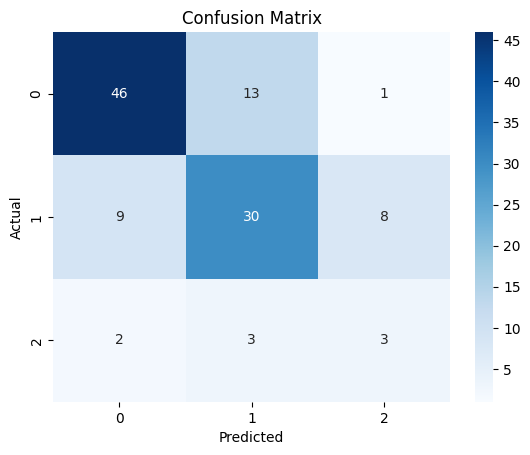

In [ ]:
# Create a Random Forest Classifier object
m_rf_classifier = RandomForestClassifier(max_depth=3, max_features=20, n_estimators=90, min_samples_split=15, class_weight='balanced', random_state=42)

# Train the classifier on the normalized training data
m_rf_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the training and testing data
y_pred_train = m_rf_classifier.predict(X_train_scaled)
y_test_pred = m_rf_classifier.predict(X_test_scaled)

# Calculate accuracyaccuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision
precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# Calculate specificity
specificity = recall_score(y_test, y_test_pred, pos_label=0, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted')
# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

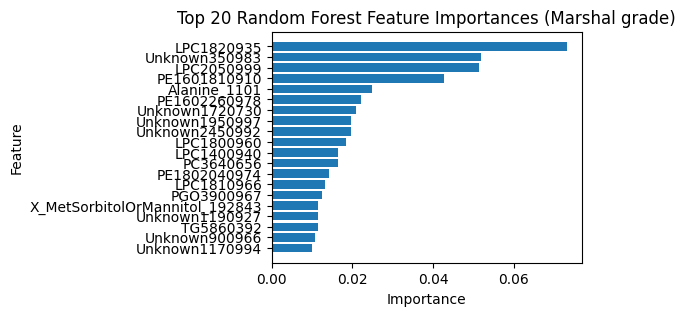

In [ ]:
# Identify important features in data that influences CT Findings
importances = m_rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
sorted_feature_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Select the top 20 important features
top_20_feature_importances = sorted_feature_importances[:20]
top_20_feature_names = sorted_feature_names[:20]

# Create a bar plot to visualize the top 20 feature importances
plt.figure(figsize=(4, 3))
plt.barh(range(len(top_20_feature_importances)), top_20_feature_importances)
plt.yticks(range(len(top_20_feature_importances)), top_20_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Random Forest Feature Importances (Marshal grade)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score

# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    m_rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = m_rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, m_rf_classifier.predict_proba(X_test), average='weighted', multi_class='ovr')
    roc_auc_scores.append(roc_auc)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Calculate the mean and std of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

Mean Accuracy: 0.6004 ± 0.0515
Mean Precision: 0.6169 ± 0.0661
Mean Recall: 0.6004 ± 0.0515
Mean F1 Score: 0.6008 ± 0.0544
Mean ROC AUC: 0.7183 ± 0.0576


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.5685, 0.6323)


# **ADABOOST (CT FINDINGS AS TARGET VARIABLE)**

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})

In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Training Accuracy: 0.78
Testing Accuracy: 0.72
Precision: 0.7090909090909091
Sensitivity/Recall: 0.7090909090909091
Specificity: 0.7333333333333333
F1 Score: 0.7090909090909091


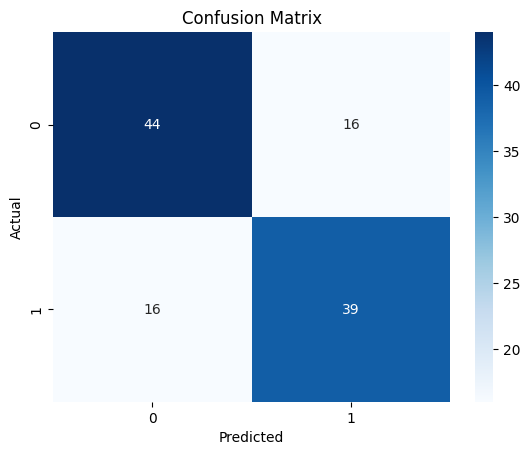

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_split=10, random_state=42)
ct_adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=40, learning_rate=0.1, random_state=42)

# Train the AdaBoostClassifier on the training set
ct_adaboost.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = ct_adaboost.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = ct_adaboost.predict(X_test_scaled)

# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_test_pred)
print("Precision:", precision)

# Calculate sensitivity/recall
sensitivity = recall_score(y_test, y_test_pred)
print("Sensitivity/Recall:", sensitivity)

# Calculate specificity
specificity = recall_score(y_test, y_test_pred, pos_label=0)
print("Specificity:", specificity)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print("F1 Score:", f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

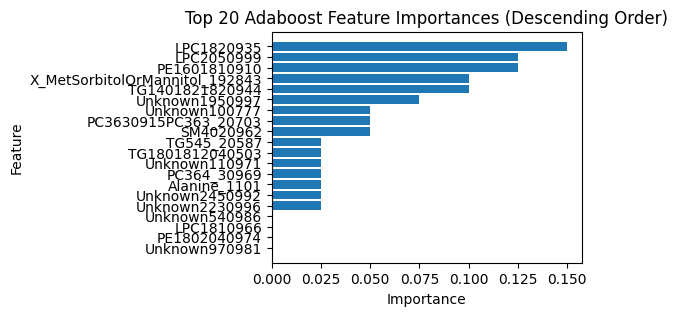

In [ ]:
# Identify important features in data that influences CT Findings
importances = ct_adaboost.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
sorted_feature_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Select the top 20 important features
top_20_feature_importances = sorted_feature_importances[:20]
top_20_feature_names = sorted_feature_names[:20]

# Create a bar plot to visualize the top 20 feature importances
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
plt.barh(range(len(top_20_feature_importances)), top_20_feature_importances)
plt.yticks(range(len(top_20_feature_importances)), top_20_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Adaboost Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

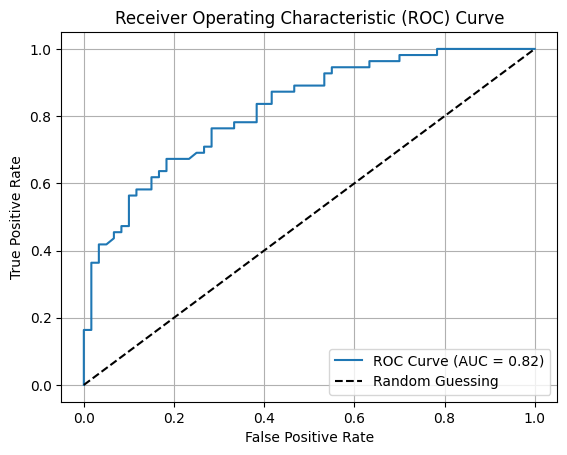

In [ ]:
# Create and ROC AUC Curve
y_test_probsa = ct_adaboost.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fpra, tpra, thresholdsa = roc_curve(y_test, y_test_probsa)

# Calculate the AUC (Area Under the Curve) score
auca = roc_auc_score(y_test, y_test_probsa)

# Plot the ROC curve
plt.plot(fpra, tpra, label='ROC Curve (AUC = {:.2f})'.format(auca))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score
from sklearn.model_selection import KFold
# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    ct_adaboost.fit(X_train, y_train)

    # Make predictions
    y_pred = ct_adaboost.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")

Mean Accuracy: 0.6790 ± 0.0754
Mean Precision: 0.6639 ± 0.0984
Mean Recall: 0.6568 ± 0.1102
Mean F1 Score: 0.6546 ± 0.0798


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.6323, 0.7257)


# **ADABOOST (MARSHAL GRADE AS TARGET VARIABLE)**

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["Marshall CT"].map({"Negative":0, "Diffuse Injury":1, "Mass Lesion":2})


In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.7096069868995634
Test Accuracy: 0.6869565217391305
Precision: 0.6792202750665485
Sensitivity (Recall): 0.6869565217391305
Specificity: 0.6869565217391305
F1 Score: 0.6723286509485152


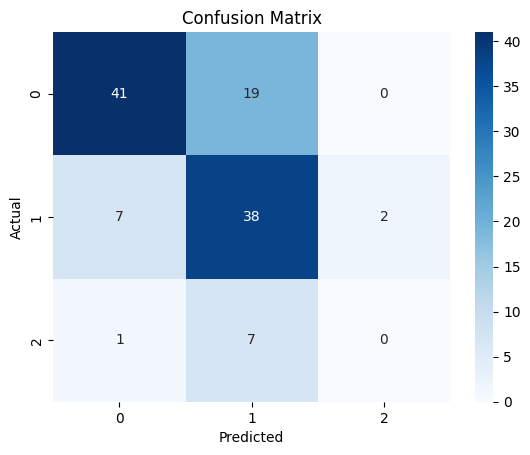

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1, min_samples_split=10, random_state=42)
m_adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=200, learning_rate=0.1, random_state=42)

# Train the AdaBoostClassifier on the training set
m_adaboost.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = m_adaboost.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = m_adaboost.predict(X_test_scaled)

# Calculate accuracyaccuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision
precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# Calculate specificity
specificity = recall_score(y_test, y_test_pred, pos_label=0, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

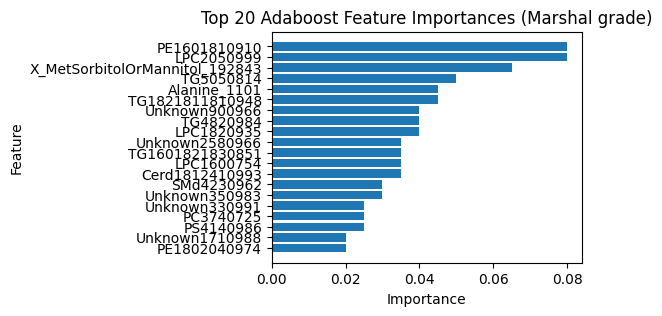

In [ ]:
# Identify important features in data that influences CT Findings
importances = m_adaboost.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
sorted_feature_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Select the top 20 important features
top_20_feature_importances = sorted_feature_importances[:20]
top_20_feature_names = sorted_feature_names[:20]

# Create a bar plot to visualize the top 50 feature importances
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
plt.barh(range(len(top_20_feature_importances)), top_20_feature_importances)
plt.yticks(range(len(top_20_feature_importances)), top_20_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Adaboost Feature Importances (Marshal grade)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score

# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    m_adaboost.fit(X_train, y_train)

    # Make predictions
    y_pred = m_adaboost.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, m_adaboost.predict_proba(X_test), average='weighted', multi_class='ovr')
    roc_auc_scores.append(roc_auc)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Calculate the mean and std of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

Mean Accuracy: 0.6004 ± 0.0449
Mean Precision: 0.6076 ± 0.0869
Mean Recall: 0.6004 ± 0.0449
Mean F1 Score: 0.5858 ± 0.0527
Mean ROC AUC: 0.6338 ± 0.0319


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.5725, 0.6282)


# **EXTREME GRADIENT BOOST (CT FINDINGS AS TARGET VARIABLE)**

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["CT Findings"].map({"Positive CT":1, "Negative CT":0})

In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.7947598253275109
Test Accuracy: 0.7652173913043478
Precision: 0.7413793103448276
Sensitivity/Recall: 0.7818181818181819
Specificity: 0.75
F1 Score: 0.7610619469026548


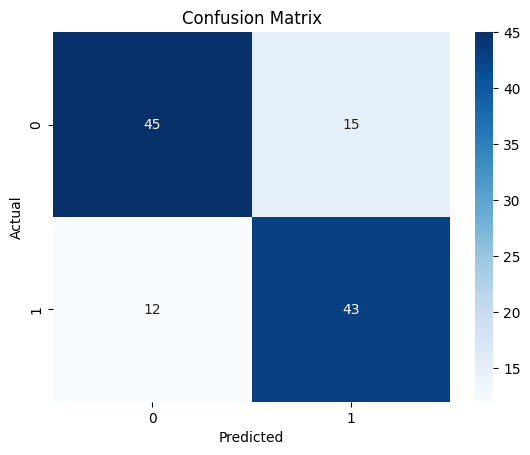

In [ ]:
import xgboost as xgb

ct_model = xgb.XGBClassifier(max_depth=1, subsample=0.8, n_estimators=100, learning_rate=0.08, random_state=42)

ct_model.fit(X_train_scaled, y_train)

# Make predictions on the normalized test data
y_pred_train = ct_model.predict(X_train_scaled)
y_pred_test = ct_model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate sensitivity/recall
sensitivity = recall_score(y_test, y_pred_test)
print("Sensitivity/Recall:", sensitivity)

# Calculate specificity
specificity = recall_score(y_test, y_pred_test, pos_label=0)
print("Specificity:", specificity)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

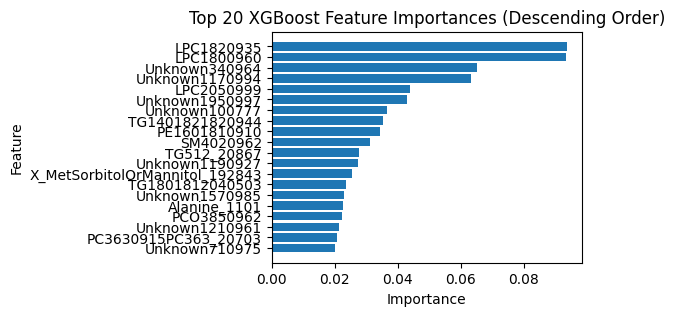

In [ ]:
# Identify important features in data that influences CT Findings
importances = ct_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
sorted_feature_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Select the top 20 important features
top_20_feature_importances = sorted_feature_importances[:20]
top_20_feature_names = sorted_feature_names[:20]

# Create a bar plot to visualize the top 20 feature importances
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
plt.barh(range(len(top_20_feature_importances)), top_20_feature_importances)
plt.yticks(range(len(top_20_feature_importances)), top_20_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 XGBoost Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


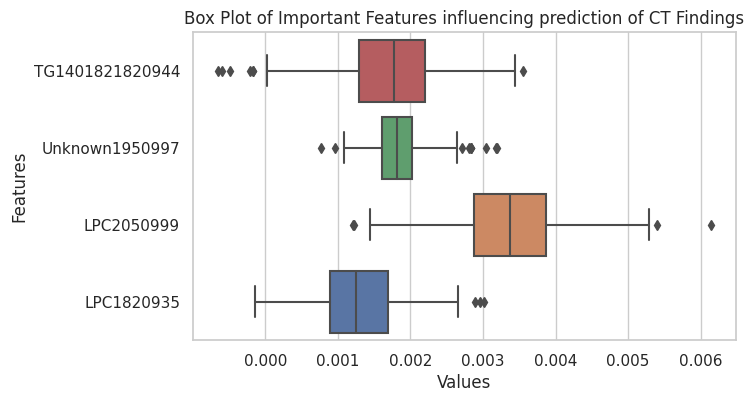

In [ ]:
selected_columns = ['LPC1820935', 'LPC2050999', 'Unknown1950997', 'TG1401821820944']
X_selected = X[selected_columns]
sns.set(style="whitegrid")

# Create a box plot for all columns in the DataFrame
plt.figure(figsize=(7, 4))  # Optionally, set the figure size
sns.boxplot(data=X_selected, orient='h')

# Customize the plot labels and title
plt.title('Box Plot of Important Features influencing prediction of CT Findings')
plt.ylabel('Features')
plt.xlabel('Values')

# Invert the y-axis if needed
plt.gca().invert_yaxis()

# Show the box plot
plt.show()



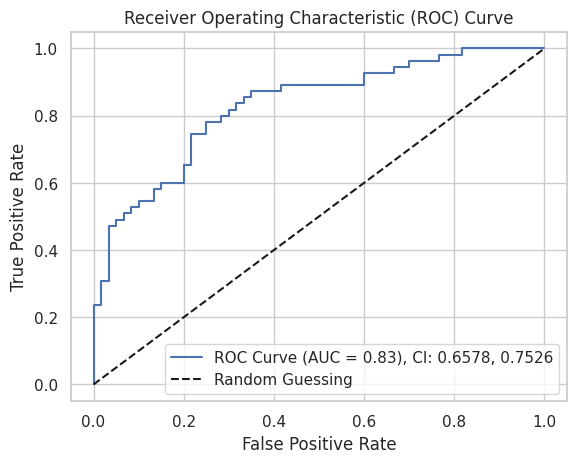

In [ ]:
# Create and ROC AUC Curve
y_test_probsx = ct_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fprx, tprx, thresholdsx = roc_curve(y_test, y_test_probsx)

# Calculate the AUC (Area Under the Curve) score
aucx = roc_auc_score(y_test, y_test_probsx)

# Plot the ROC curve
plt.plot(fprx, tprx, label='ROC Curve (AUC = {:.2f})'.format(aucx))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

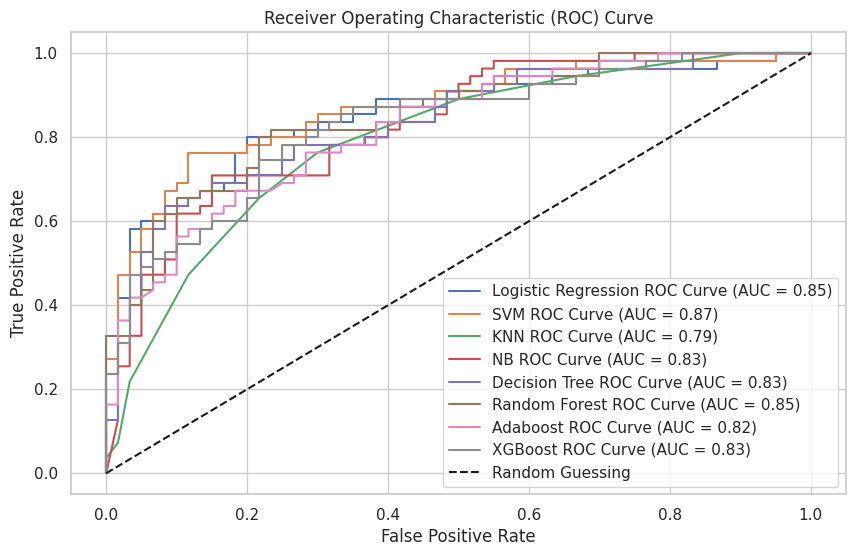

In [ ]:
plt.figure(figsize=(10, 6))
# Plot the ROC curve
plt.plot(fprl, tprl, label='Logistic Regression ROC Curve (AUC = {:.2f})'.format(aucl))
plt.plot(fprs, tprs, label='SVM ROC Curve (AUC = {:.2f})'.format(aucs))
plt.plot(fprk, tprk, label='KNN ROC Curve (AUC = {:.2f})'.format(auck))
plt.plot(fprn, tprn, label='NB ROC Curve (AUC = {:.2f})'.format(aucn))
plt.plot(fprd, tprd, label='Decision Tree ROC Curve (AUC = {:.2f})'.format(aucd))
plt.plot(fprr, tprr, label='Random Forest ROC Curve (AUC = {:.2f})'.format(aucr))
plt.plot(fpra, tpra, label='Adaboost ROC Curve (AUC = {:.2f})'.format(auca))
plt.plot(fprx, tprx, label='XGBoost ROC Curve (AUC = {:.2f})'.format(aucx))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score
from sklearn.model_selection import KFold
# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    ct_model.fit(X_train, y_train)

    # Make predictions
    y_pred = ct_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")

Mean Accuracy: 0.7052 ± 0.0765
Mean Precision: 0.6845 ± 0.1059
Mean Recall: 0.6947 ± 0.1052
Mean F1 Score: 0.6851 ± 0.0872


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.6578, 0.7526)


#**EXTREME GRADIENT BOOST (MARSHAL GRADE AS TARGET VARIABLE)**

In [ ]:
features_list = feature_scores.head(198)['Feature'].tolist()
X = pd.DataFrame(X[features_list])
y = tbi_two["Marshall CT"].map({"Negative":0, "Diffuse Injury":1, "Mass Lesion":2})


In [ ]:
#Split data set into training and test set and then scale training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

Train Accuracy: 0.8056768558951966
Test Accuracy: 0.6782608695652174
Precision: 0.6619843924191752
Sensitivity (Recall): 0.6782608695652174
Specificity: 0.6782608695652174
F1 Score: 0.6662134387351778


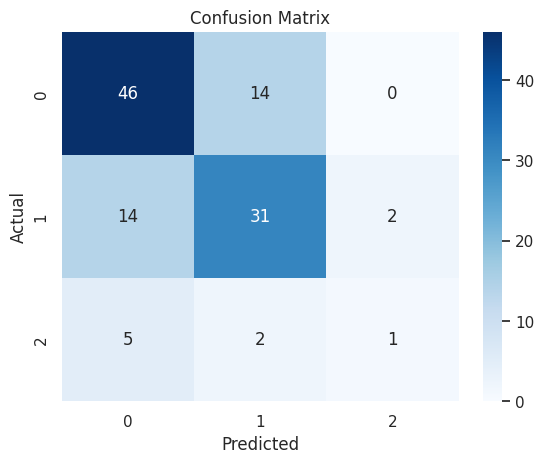

In [ ]:
m_model = xgb.XGBClassifier(max_depth=1, subsample=0.9, n_estimators=150, learning_rate=0.1)

m_model.fit(X_train_scaled, y_train)

# Make predictions on the normalized test data
y_pred_train = m_model.predict(X_train_scaled)
y_test_pred = m_model.predict(X_test_scaled)

# Calculate accuracyaccuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision
precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# Calculate specificity
specificity = recall_score(y_test, y_test_pred, pos_label=0, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

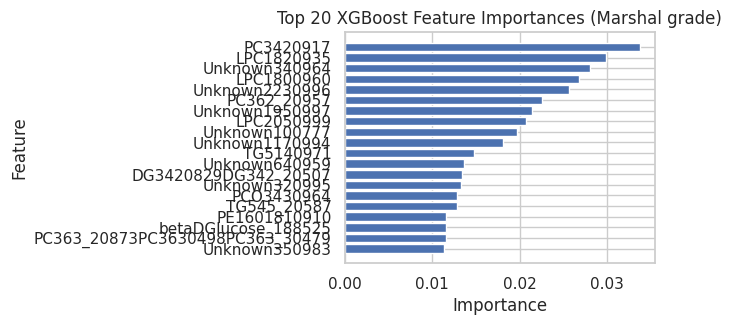

In [ ]:
# Identify important features in data that influences CT Findings
importances = m_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
sorted_feature_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Select the top 20 important features
top_20_feature_importances = sorted_feature_importances[:20]
top_20_feature_names = sorted_feature_names[:20]

# Create a bar plot to visualize the top 50 feature importances
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed
plt.barh(range(len(top_20_feature_importances)), top_20_feature_importances)
plt.yticks(range(len(top_20_feature_importances)), top_20_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 XGBoost Feature Importances (Marshal grade)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

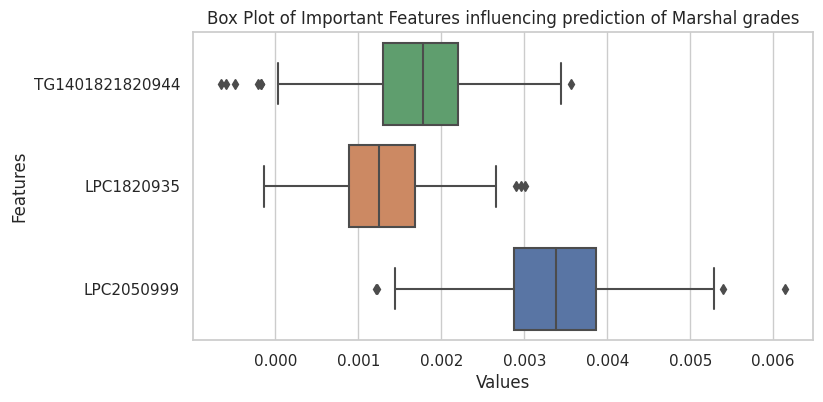

In [ ]:
selected_columns = ['LPC2050999', 'LPC1820935', 'TG1401821820944']
X_selected = X[selected_columns]
sns.set(style="whitegrid")

# Create a box plot for all columns in the DataFrame
plt.figure(figsize=(8, 4))  # Optionally, set the figure size
sns.boxplot(data=X_selected, orient='h')

# Customize the plot labels and title
plt.title('Box Plot of Important Features influencing prediction of Marshal grades')
plt.ylabel('Features')
plt.xlabel('Values')

# Invert the y-axis if needed
plt.gca().invert_yaxis()

# Show the box plot
plt.show()

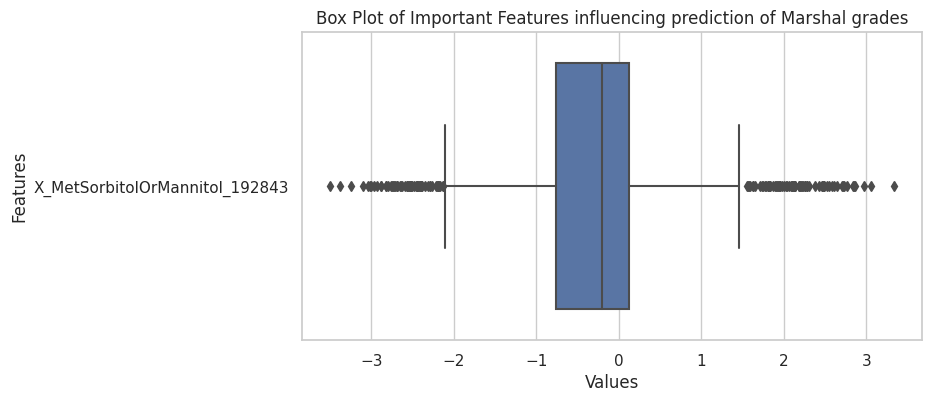

In [ ]:
selected_columns = ['X_MetSorbitolOrMannitol_192843']
X_selected = X[selected_columns]
sns.set(style="whitegrid")

# Create a box plot for all columns in the DataFrame
plt.figure(figsize=(8, 4))  # Optionally, set the figure size
sns.boxplot(data=X_selected, orient='h')

# Customize the plot labels and title
plt.title('Box Plot of Important Features influencing prediction of Marshal grades')
plt.ylabel('Features')
plt.xlabel('Values')

# Invert the y-axis if needed
plt.gca().invert_yaxis()

# Show the box plot
plt.show()

In [ ]:
# Perform a K Fold cross validation and obtain mean accuracy, precision, recall, specificity, F1 score, and ROC/AUC score

# Create and empty list to store the mean accuracies
accuracies = []
precisions = []
recalls = []
specificity = []
f1_scores = []
roc_auc_scores = []

# Perform K Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

    # Create and train model on X_train and y_train
    m_model.fit(X_train, y_train)

    # Make predictions
    y_pred = m_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, specificity and F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    specificity = recall_score(y_test, y_pred, pos_label=0, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

# Append each fold accuracy to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    #specificity.append(specificity)
    f1_scores.append(f1)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, m_adaboost.predict_proba(X_test), average='weighted', multi_class='ovr')
    roc_auc_scores.append(roc_auc)

#Compute the mean accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1_score = np.mean(f1_scores)
std_f1_score = np.std(f1_scores)

# Calculate the mean and std of ROC AUC scores
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print accuracies
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score: {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

Mean Accuracy: 0.6178 ± 0.0769
Mean Precision: 0.5901 ± 0.0918
Mean Recall: 0.6178 ± 0.0769
Mean F1 Score: 0.5943 ± 0.0869
Mean ROC AUC: 0.7057 ± 0.0519


In [ ]:
# Compute the confidence interval for the accuracies
# iImport library
import scipy.stats as stats

# Confidence level set to 95%
confidence_level = 0.95

# Calculate the standard error (standard deviation / sqrt(number of folds))
standard_error = std_accuracy / np.sqrt(len(accuracies))

# Calculate the margin of error (critical value * standard error)
critical_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = critical_value * standard_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_accuracy - margin_of_error
upper_bound = mean_accuracy + margin_of_error

# Print confidence interval
print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.5701, 0.6654)


Test the model with the Functions.
Simply upload the validation_set to drive, copy path and paste inbetween the brackets of the functions ct_predictor and ct_marshal grade to predict CT findings and Marshal grade respectively.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/serum_tbi')

In [ ]:
from models.ct_prediction_function import ct_predictor
from models.m_prediction_funtion import m_predictor